In [211]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline  
#make the plot outputs to appear in the jupyter notebook itself and not as seperate pop up

# Reading the dataset

In [212]:
df = pd.read_csv("Churn_Modelling.csv")

In [213]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [214]:
df.sample(5) 
# Provides any 5 samples from the overall dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3050,3051,15699247,Chapman,791,France,Female,44,5,0.00,2,1,1,123977.86,1
8052,8053,15770121,Bancroft,623,France,Female,34,9,0.00,1,1,0,24255.21,0
9152,9153,15611315,Ts'ao,708,Germany,Female,23,4,71433.08,1,1,0,103697.57,0
4665,4666,15656293,Davey,786,France,Male,35,3,0.00,2,1,0,92712.97,0
5239,5240,15750811,Woodward,766,Germany,Male,44,3,116822.70,1,0,0,197643.24,0


In [215]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [216]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Data Cleaning

In [217]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis = 'columns', inplace = True) 
# removing unnecessary data from the dataset

In [218]:
df 
# if exited = 1, the customer has left 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [219]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [220]:
df = pd.get_dummies(data=df, columns = ['Geography']) 
# One hot encoding of 'Geography column'
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [221]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [222]:
df.dtypes

CreditScore            int64
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [223]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace = True)  
#  Label Encoding of the 'Gender' column
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


# Scaling the data

In [224]:
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [225]:
from sklearn.preprocessing import MinMaxScaler

In [226]:
sc = MinMaxScaler()

In [227]:
df[columns_to_scale] = sc.fit_transform(df[columns_to_scale])
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


# Splitting the dataset into training data and testing data

In [228]:
x = df.drop('Exited', axis = 'columns')
y = df['Exited']

In [229]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1,0,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,0,1,0


In [230]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [233]:
x_train.shape

(8000, 12)

In [234]:
len(x_train.columns)

12

# Creating a Neural Network

In [235]:
import tensorflow as tf
from tensorflow import keras

In [236]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (12,), activation = 'relu'),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [237]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [238]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6016 - accuracy: 0.7031
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4882 - accuracy: 0.7960: 0s - loss: 0.486
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7993
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8050
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.8084
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8096
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8115
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8139
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - los

In [239]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8575


[0.3380261957645416, 0.8575000166893005]

In [240]:
y_pred = model.predict(x_test)

In [241]:
y_pred[:5]

array([[0.35312226],
       [0.37453115],
       [0.18870243],
       [0.03235346],
       [0.03385234]], dtype=float32)

In [242]:
y_pred1 = []
for element in y_pred:
    if element > 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)


In [243]:
y_pred1[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

In [244]:
np.array(y_test[:10])

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

# Confusion Matrix

Text(69.0, 0.5, 'True value')

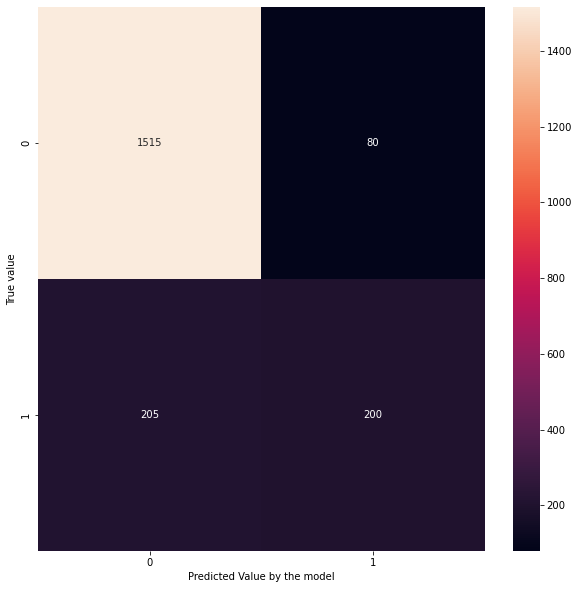

In [245]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred1)
plt.figure(figsize = (10,10))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted Value by the model')
plt.ylabel('True value')

# Classification Report

In [246]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.49      0.58       405

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

